## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [62]:
#required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
import warnings
warnings.simplefilter("ignore")


from sklearn import datasets,  metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [63]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")


In [64]:
dataset=dataset.rename(columns=dataset.iloc[0]).drop(dataset.index[0]).astype('int64')

In [65]:
dataset.drop(columns='ID', axis=0,inplace=True)

In the following, you can take a look into the dataset.

In [66]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [67]:
X = dataset.drop(columns=['default payment next month'])
y = dataset['default payment next month']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.5 MB


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [70]:
# YOUR CODE HERE

In [71]:
tree_clf1 = DecisionTreeClassifier(max_depth=5, criterion='entropy')#,min_samples_leaf= 1 ,min_samples_split= 2,random_state=123)
tree_clf1.fit(X_train, y_train)
y_pred_tree1 = tree_clf1.predict(X_test)
print(accuracy_score(y_test, y_pred_tree1))

0.8197777777777778


In [72]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_tree1))

Confusion matrix:
[[6703  291]
 [1331  675]]


In [73]:
print("Classification report for classifier %s:\n%s\n"
      % (tree_clf1, metrics.classification_report(y_test, y_pred_tree1)))

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=5):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6994
           1       0.70      0.34      0.45      2006

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000




In [74]:
tree_clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini')#,min_samples_leaf= 1 ,min_samples_split= 2,random_state=123)
tree_clf2.fit(X_train, y_train)
y_pred_tree2 = tree_clf2.predict(X_test)
print(accuracy_score(y_test, y_pred_tree2))

0.8121111111111111


In [75]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_tree2))

Confusion matrix:
[[6605  389]
 [1302  704]]


In [76]:
print("Classification report for classifier %s:\n%s\n"
      % (tree_clf2, metrics.classification_report(y_test, y_pred_tree2)))

Classification report for classifier DecisionTreeClassifier(max_depth=10):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6994
           1       0.64      0.35      0.45      2006

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000




Comment and analysis: By compare model 1(max_depth=5,criterion=enthopy) vs model 2(max_depth=10,criterion=gini), model 1 with mx_depth=5 has higher accuracy, precision is higher as well.

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [77]:
# YOUR CODE HERE

In [78]:

from sklearn.model_selection import RandomizedSearchCV

param_grid_dt4 = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(1, 10),
    "min_samples_leaf": range(1, 10)
}

# Instantiate the model
model_dt4 = DecisionTreeClassifier() #criterion='entropy',

# Instantiate grid search model
grid_search_dt4 = RandomizedSearchCV(model_dt4, param_grid_dt4,cv=10)##,verbose=1,n_jobs=-1)

# Fit grid search to the data
grid_search_dt4.fit(X_train, y_train)




# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_search_dt4.best_params_))
print("Best score is {}".format(grid_search_dt4.best_score_))

print(grid_search_dt4.best_score_)
print(grid_search_dt4.best_params_)
print(grid_search_dt4.best_estimator_)

Tuned Decision Tree Parameters: {'min_samples_split': 7, 'min_samples_leaf': 9, 'max_depth': 3, 'criterion': 'gini'}
Best score is 0.8204285714285715
0.8204285714285715
{'min_samples_split': 7, 'min_samples_leaf': 9, 'max_depth': 3, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=7)


In [79]:
#based on above, best model Tuned Decision Tree Parameters: {'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'entropy'}
best_dt1=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,min_samples_split=9)
best_dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=9)

In [80]:
y_pred_bestdt1 = best_dt1.predict(X_test)
print(accuracy_score(y_test, y_pred_bestdt1))

0.8214444444444444


Comments: by using Randomized Search to Hypertune the model, we get better model compare to Q1, the accuracy score 82.1% is getting a little bit higher with decision tree model (max_depth=3, criterion="entropy", with min_samples_leaf=2,min_samples_split=9) vs model1 (max_depth=5, criterion="entropy")of Q1 with accuracy is about 81.9%

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [81]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=3)
rnd_clf.fit(X_train, y_train)

y_pred_1 = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_1))


0.8102222222222222


In [82]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_2 = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_2))

0.8115555555555556


In [83]:
ex_clf = ExtraTreesClassifier(n_estimators=100,max_depth=3)
ex_clf.fit(X_train, y_train)
y_pred_3 = ex_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_3))

0.779


In [84]:
gbes = ensemble.GradientBoostingClassifier(n_estimators=100,max_depth=3)
gbes.fit(X_train, y_train)
y_pred_4 = gbes.predict(X_test)
print(accuracy_score(y_test, y_pred_4))

0.8225555555555556


By just compare the accuracy score with same parameters setup, AdaBoostClassifier and GradientBoostingClassifier models perform better.

In [85]:
##from scikit learning Plotting Learning Curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

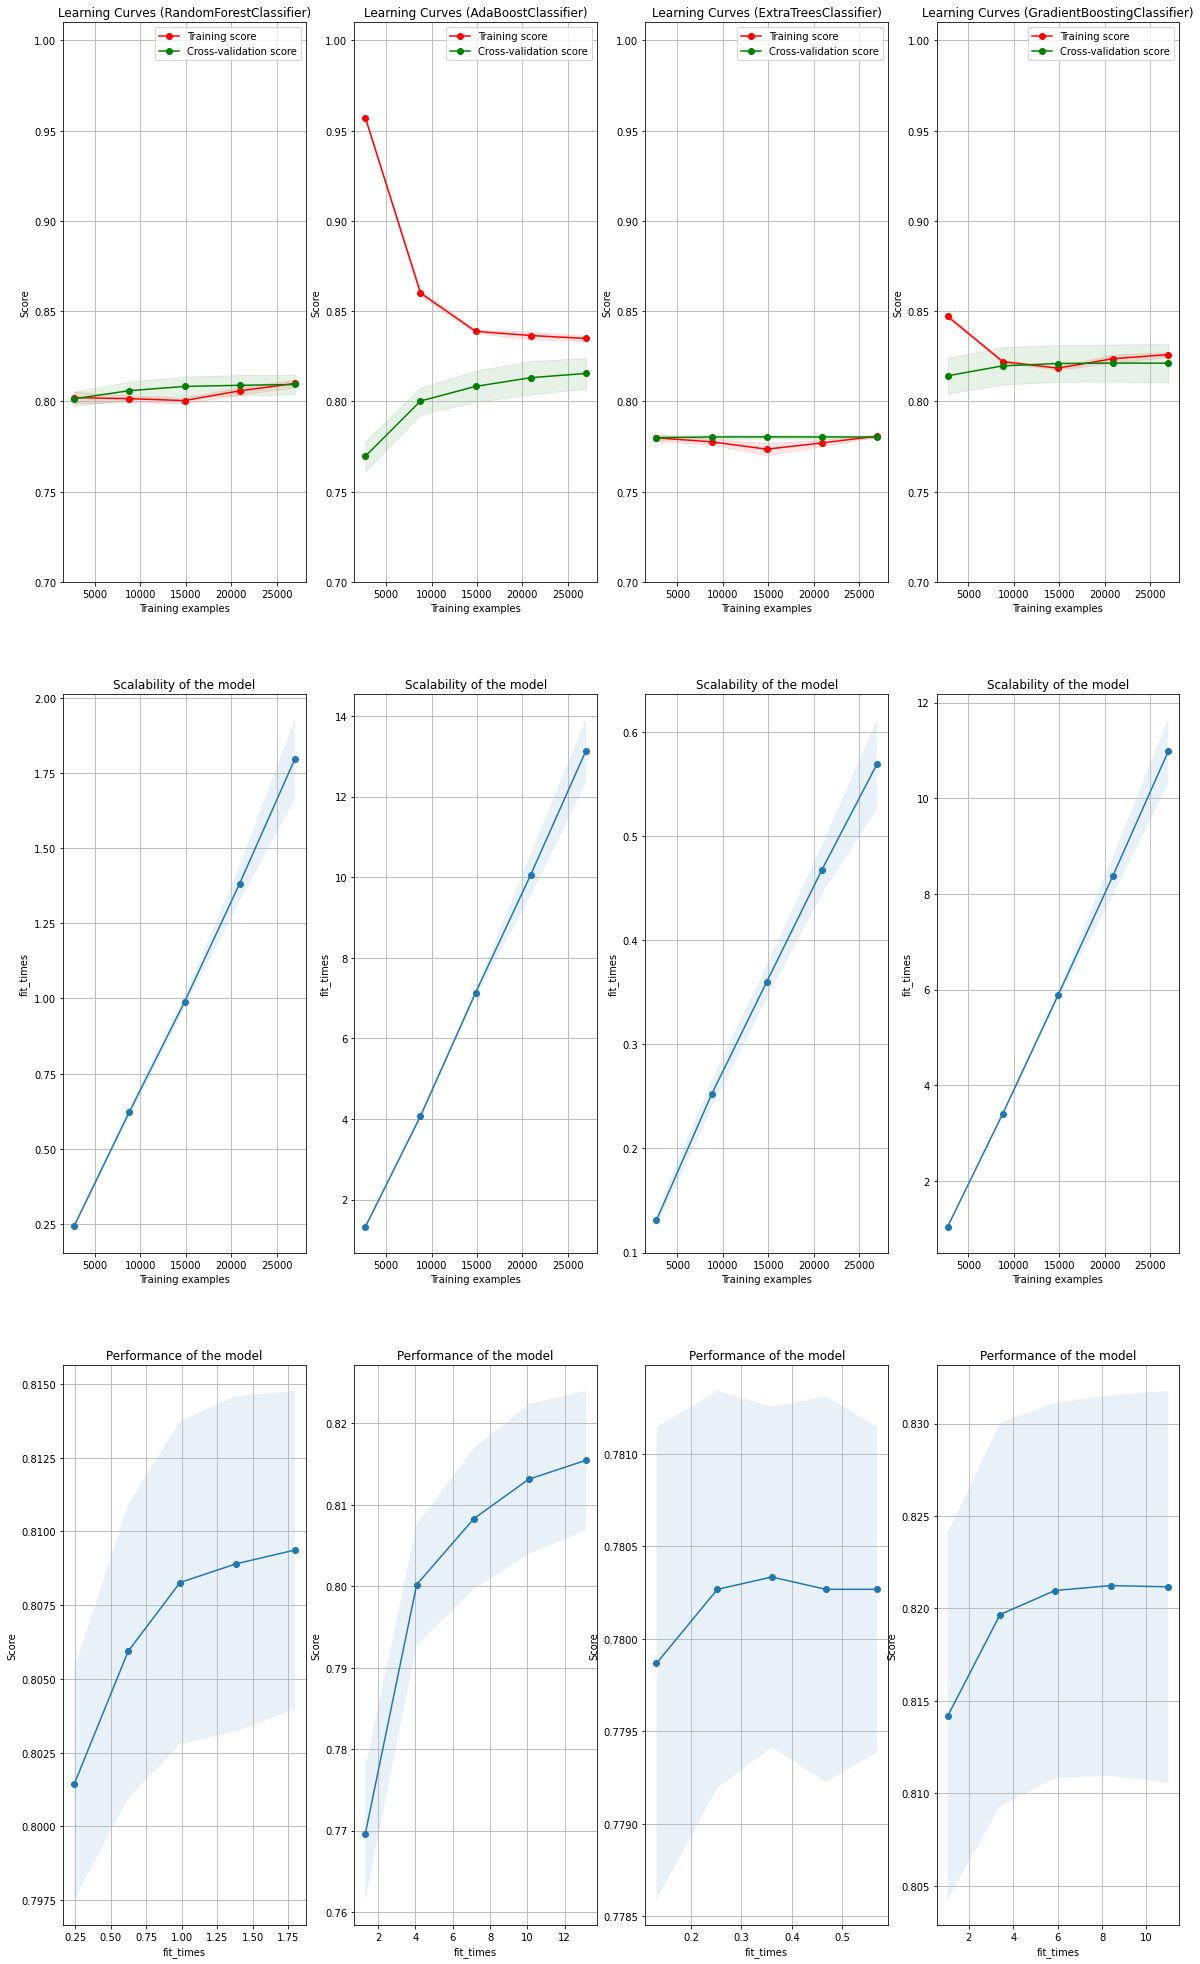

In [86]:
fig, axes = plt.subplots(3, 4, figsize=(20, 35))


title = "Learning Curves (RandomForestClassifier)"
plot_learning_curve(rnd_clf, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=10, n_jobs=5)


title = "Learning Curves (AdaBoostClassifier)"
plot_learning_curve(ada_clf, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=10, n_jobs=5)


title = "Learning Curves (ExtraTreesClassifier)"
plot_learning_curve(ex_clf, title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=10, n_jobs=5)


title = "Learning Curves (GradientBoostingClassifier)"
plot_learning_curve(gbes, title, X, y, axes=axes[:, 3], ylim=(0.7, 1.01),
                    cv=10, n_jobs=5)

plt.show()

By compare the learning curve,  AdBoostClassifier and GradientBoostingClassifier models are better, score quite high mostly above 80%, trainning score and validation score is quite similar or closer. 

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

As we concluded in Q1, when we apply different number to parameters of the same decision tree model, By compare model 1(max_depth=5,criterion=enthopy) vs model 2(max_depth=10,criterion=gini), model 1 with mx_depth=5 has higher accuracy, precision is higher as well.It does not mean more is better.
The whole goal of hyperparameters tunning is for optimizing the parameters with better performance for the model.

As we see in Q3, boosting approach performs better, based on definition of boosting. Boosting is an approach to machine learning based on the idea of creating a highly accurate prediction rule by combining many relatively weak and inaccurate rules. The main idea behind boosting is to train predictors sequentially. Each predictor is built on the error of the other predictor. That is explained when we compare the score,AdBoost and GradientBoosting model performed better. AdBoosting use modifying the weight of the instances at each step, GradientBoosting try to fit a new predictor to residual errors made by the previous predictor.

By using RandomForestClassifier, you can adjust most of the hyper-parameters for decision trees and bagging ensemble at the same time.
Extremely Randomized Trees is a version of the Random Forest algorithm, complex computation due to takes randomization to the next level by randomly selecting a threshold for each feature instead of finding the best optimized threshold.
AdaBoost,by increasing the weights of misclassified data it gives a good opportunity to the new weak classifier has an opportunity to try harder on previous classifier mistakes.
Gradient Boosting produces a prediction model in a form of ensemble of weak prediction models, typically decision trees, sequentially and each one correcting its predecessor.
In conclusion, boosting approach build stronger model than ensembing approach in this dataset.